In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('eea3b3ae715591349debdb0648a7c84e01b6937a605538cb479ce27dab729e0ce518ed7cdb22576d2f540aa47af99c9fb24e9cdd36cb24e62e6759e0bb3f93b3')

configrc.store_credentials:WARNING:2022-01-14 16:58:42,067: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

{'10': 1000}


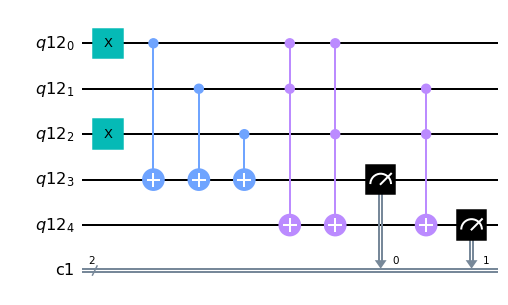

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

q = QuantumRegister(5)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

#Set initial values
qc.x(q[0])
qc.x(q[2])

#This is for the sum bit
qc.cx(q[0], q[3])
qc.cx(q[1], q[3])
qc.cx(q[2], q[3])

#This is for the carry bit
qc.ccx(q[0], q[1], q[4])
qc.ccx(q[0], q[2], q[4])
qc.ccx(q[1], q[2], q[4])

qc.measure(q[3], c[0])
qc.measure(q[4], c[1])

# execute the circuit by qasm_simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')